# Data analysis for Chapter "Ensemble properties"

In [1]:
# importing libraries
from os import getcwd, path
from pathlib import Path

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from typing import Set, List

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from ast import literal_eval

from data_analysis_helper_fun import *


In [2]:
# relative path to data directory
data_dir = path.join(Path(getcwd()).parent.absolute(), "data")
data_set_name = 're_data_tau_alpha_001-150'
data_file_name = f'{data_set_name}.csv.tar.gz'

data_set_name = 're_data_tau_alpha_01-100'
data_file_name = f'{data_set_name}.tar.gz'

data_set_name = 're_data_tau_alpha_mini'
data_file_name = f'{data_set_name}.tar.gz'



In [28]:
usecols = ['model_name', 'ds', 'init_coms', 'n_sentence_pool', 'error_code' , 'process_length', 
           'coms_evolution', 'weight_account', 'weight_systematicity', 'weight_faithfulness',
           'ds_infer_dens', 'init_coms_size', 
           'go_union_consistent', 'fp_union_consistent', 'n_global_optima', 'n_fixed_points', 
           'go_coms_consistent', 'fp_coms_consistent']
re_data= load_re_data(data_dir, data_file_name,
                 usecols=usecols,
                 filter_erroneous_runs=False)

In [22]:
print(f"The data set contains {sum(re_data['error_code'].isna()==False)}/{len(re_data)} rows of erroneous model runs.")
# filter
re_data = re_data.loc[re_data['error_code'].isna()]

The data set contains 47/174666 rows of erroneous model runs.


In [5]:
print('\033[1m' + 'General information: ' + '\033[0m')
print("   Amount of rows:" , len(re_data))
print('   Number of dialectical structures:', len(re_data['ds'].unique()))
print('   Overall number of initial commitments:', len(re_data['init_coms'].unique()))
print('   Sentence-pools:' , re_data['n_sentence_pool'].unique())
print('   Models:' , re_data['model_name'].unique())
print('\n')

General information: 
   Amount of rows: 174619
   Number of dialectical structures: 15
   Overall number of initial commitments: 60
   Sentence-pools: [6 7 8]
   Models: ['QuadraticGlobalRE' 'LinearGlobalRE' 'QuadraticLocalRE' 'LinearLocalRE']




In [6]:
re_data.columns

Index(['model_name', 'ds', 'n_sentence_pool', 'ds_infer_dens',
       'weight_account', 'weight_systematicity', 'weight_faithfulness',
       'init_coms', 'init_coms_size', 'coms_evolution', 'process_length',
       'error_code', 'fp_union_consistent', 'n_global_optima',
       'go_union_consistent', 'model_short_name'],
      dtype='object')

## Dialectical structures

### Distribution: inferential density

In [7]:
re_data.drop_duplicates(["ds"])["ds_infer_dens"].describe()

count    15.000000
mean      0.301307
std       0.090261
min       0.176880
25%       0.234840
50%       0.280639
75%       0.357146
max       0.456092
Name: ds_infer_dens, dtype: float64

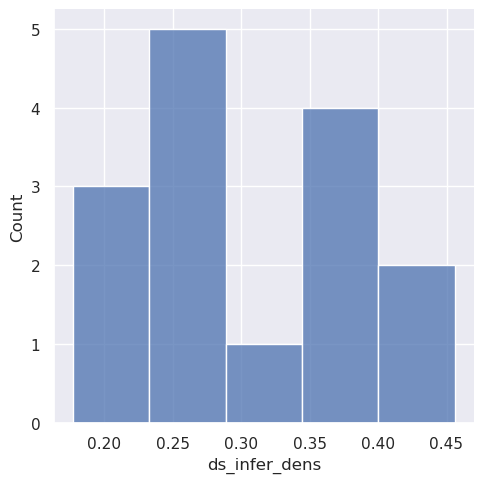

In [8]:
#re_data.drop_duplicates(["ds", "ds_infer_dens"])
sns.displot(re_data.drop_duplicates(["ds"]), x="ds_infer_dens")#, discrete=True) 

### Distribution: mean number of premises

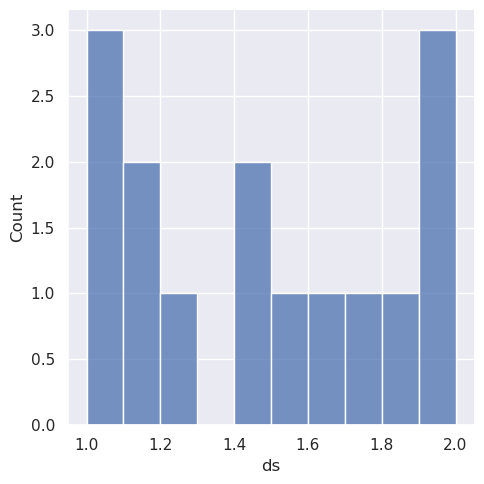

In [9]:
from statistics import mean
# WARNING: do not use `literal_eval` on unsave/unknow data
ser_ds = re_data.drop_duplicates(["ds"])["ds"]
ser_ds = ser_ds.apply(lambda x: literal_eval(x))
ser_ds = ser_ds.apply(lambda tau: mean([len(arg)-1 for arg in tau]))
#display(ser_ds)
sns.displot(ser_ds, binwidth=0.1)


## Size of initial commitments

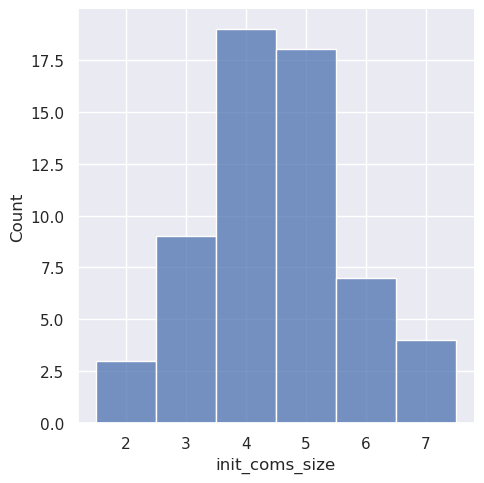

In [10]:
sns.displot(re_data.drop_duplicates(["init_coms"]), x="init_coms_size", discrete=True) 


## Process length

Here, we consider all branches.

In [11]:
prozess_length_stat_sum = re_data.groupby(['model_name','n_sentence_pool'])['process_length'].describe().reset_index()
display(prozess_length_stat_sum)


,model_name,n_sentence_pool,count,mean,std,min,25%,50%,75%,max
0,LinearGlobalRE,6,7036.0,5.356737,0.934271,4.0,4.0,6.0,6.0,6.0
1,LinearGlobalRE,7,7885.0,5.254788,0.967583,4.0,4.0,6.0,6.0,8.0
2,LinearGlobalRE,8,16736.0,5.272347,0.962228,4.0,4.0,6.0,6.0,6.0
3,LinearLocalRE,6,8698.0,8.950333,2.583782,4.0,8.0,10.0,12.0,14.0
4,LinearLocalRE,7,16503.0,10.812216,3.110624,4.0,8.0,12.0,14.0,16.0
5,LinearLocalRE,8,38815.0,12.326317,2.691804,4.0,10.0,14.0,14.0,18.0
6,QuadraticGlobalRE,6,7872.0,6.095783,0.950816,4.0,6.0,6.0,6.0,10.0
7,QuadraticGlobalRE,7,11316.0,6.256981,1.103591,4.0,6.0,6.0,6.0,12.0
8,QuadraticGlobalRE,8,15500.0,6.322968,0.967209,4.0,6.0,6.0,6.0,12.0
9,QuadraticLocalRE,6,11939.0,8.916157,2.375799,4.0,8.0,8.0,10.0,18.0


Text(0.5, 0, 'Size of sentence pool')

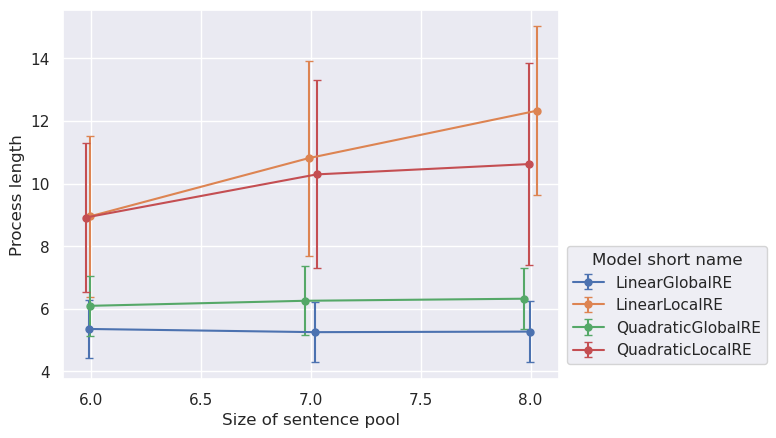

In [12]:
# adding jitter
import random

prozess_length_stat_sum['n_sentence_pool'] = prozess_length_stat_sum.apply(lambda x: x['n_sentence_pool']+random.uniform(-0.03, 0.03), axis=1)

for name, group in prozess_length_stat_sum.groupby('model_name'):
    #display(group)
    plt.errorbar(group['n_sentence_pool'], 
                 group['mean'],
                 yerr=group['std'],
                 marker='o', 
                 #linestyle='', # providing an empty string omits lines 
                 markersize=5,
                 capsize=3,
                 label=name)


plt.legend(loc='center left', bbox_to_anchor=(1., 0.2), ncol=1, title='Model short name')
plt.ylabel('Process length')
plt.xlabel('Size of sentence pool')

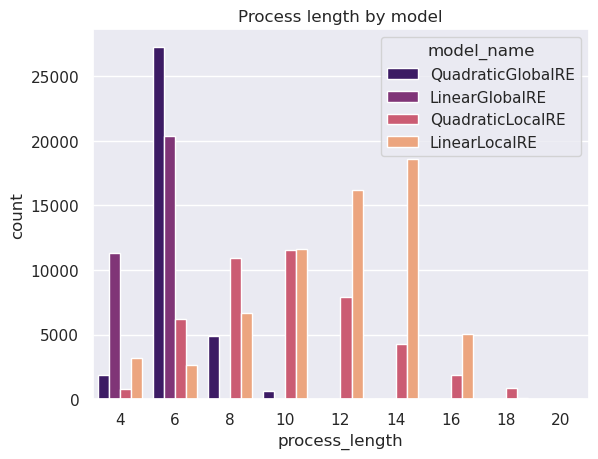

In [15]:
sns.countplot(x = 'process_length', hue = 'model_name', data = re_data, palette = 'magma')
plt.title('Process length by model')
plt.show()

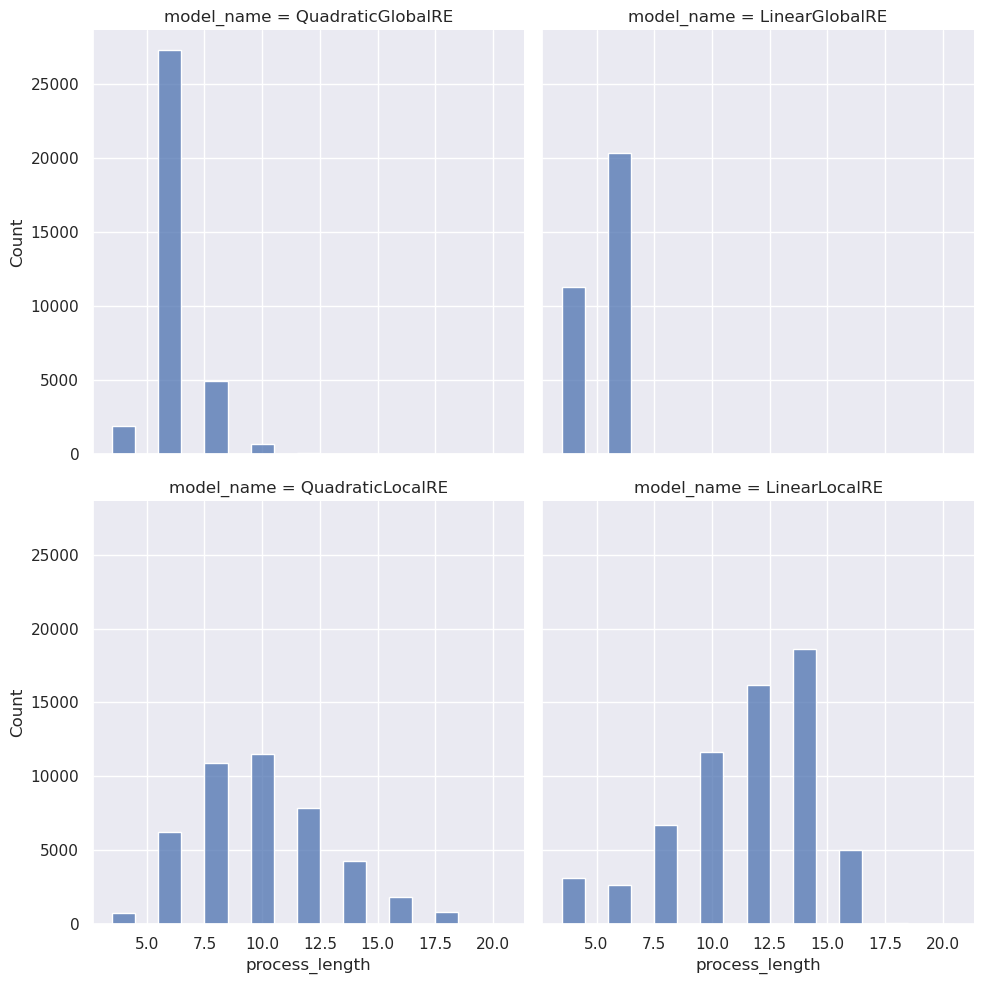

In [16]:
sns.displot(re_data, x="process_length", discrete=True, 
            col="model_name", col_wrap=2)

## Counting branches

In [29]:
# Cols that should have identical values for all branches (and only for those) that belong to one branching model run
cols_group_branches = ['model_name', 'model_short_name', 'ds','init_coms', 'weight_account', 'weight_systematicity', 'weight_faithfulness', 'n_sentence_pool'] 
#cols_group_branches = ['model_name', 'model_short_name', 'ds','init_coms', 'weight_account', 'weight_systematicity', 'weight_faithfulness'] 


# Calculating the number of branches for each model run
# (We could take any col that has no missing values...)
#df_branches = re_data.groupby(cols_group_branches)['process_length'].count().reset_index()
df_branches = DataFrame({'n_branches' : re_data.groupby(cols_group_branches).size()}).reset_index()

In [30]:
display(df_branches)

,model_name,model_short_name,ds,init_coms,weight_account,weight_systematicity,weight_faithfulness,n_sentence_pool,n_branches
0,LinearGlobalRE,LGRE,"[[-1, -2, 5], [7, 4, 1], [3, -6, -7], [1, -5, ...","{-5, 4, -2, 7}",0.1,0.1,0.8,8,8
1,LinearGlobalRE,LGRE,"[[-1, -2, 5], [7, 4, 1], [3, -6, -7], [1, -5, ...","{-5, 4, -2, 7}",0.1,0.2,0.7,8,8
2,LinearGlobalRE,LGRE,"[[-1, -2, 5], [7, 4, 1], [3, -6, -7], [1, -5, ...","{-5, 4, -2, 7}",0.1,0.3,0.6,8,8
3,LinearGlobalRE,LGRE,"[[-1, -2, 5], [7, 4, 1], [3, -6, -7], [1, -5, ...","{-5, 4, -2, 7}",0.1,0.4,0.5,8,8
4,LinearGlobalRE,LGRE,"[[-1, -2, 5], [7, 4, 1], [3, -6, -7], [1, -5, ...","{-5, 4, -2, 7}",0.1,0.5,0.4,8,8
...,...,...,...,...,...,...,...,...,...
415681,QuadraticLocalRE,QLRE,"[[8, 6], [4, 8], [1, -6], [2, -6], [7, 6], [-5...","{6, 8, -1, -7, -3, -2}",0.6,0.2,0.2,8,2
415682,QuadraticLocalRE,QLRE,"[[8, 6], [4, 8], [1, -6], [2, -6], [7, 6], [-5...","{6, 8, -1, -7, -3, -2}",0.6,0.3,0.1,8,2
415683,QuadraticLocalRE,QLRE,"[[8, 6], [4, 8], [1, -6], [2, -6], [7, 6], [-5...","{6, 8, -1, -7, -3, -2}",0.7,0.1,0.2,8,2
415684,QuadraticLocalRE,QLRE,"[[8, 6], [4, 8], [1, -6], [2, -6], [7, 6], [-5...","{6, 8, -1, -7, -3, -2}",0.7,0.2,0.1,8,2


In [41]:
df_n_branches = df_branches.groupby(['model_name', 
                                     'model_short_name',
                                     'n_sentence_pool'])['n_branches'].describe().reset_index()
display(df_n_branches)

,model_name,model_short_name,n_sentence_pool,count,mean,std,min,25%,50%,75%,max
0,LinearGlobalRE,LGRE,6,36000.0,1.801556,2.074559,1.0,1.0,1.0,2.0,96.0
1,LinearGlobalRE,LGRE,7,36000.0,2.160444,2.806368,1.0,1.0,1.0,2.0,64.0
2,LinearGlobalRE,LGRE,8,36000.0,3.552278,6.762538,1.0,1.0,2.0,4.0,384.0
3,LinearLocalRE,LLRE,6,36000.0,2.408556,3.320417,1.0,1.0,1.0,2.0,46.0
4,LinearLocalRE,LLRE,7,35927.0,4.969188,14.090433,1.0,1.0,2.0,4.0,492.0
5,LinearLocalRE,LLRE,8,35619.0,10.833039,29.403501,1.0,1.0,2.0,6.0,492.0
6,QuadraticGlobalRE,QGRE,6,36000.0,2.220611,3.666391,1.0,1.0,1.0,2.0,223.0
7,QuadraticGlobalRE,QGRE,7,35998.0,3.090783,6.296975,1.0,1.0,2.0,3.0,288.0
8,QuadraticGlobalRE,QGRE,8,35998.0,3.858909,10.188013,1.0,1.0,2.0,3.0,432.0
9,QuadraticLocalRE,QLRE,6,36000.0,3.072722,3.674904,1.0,1.0,2.0,4.0,92.0


Text(0.5, 0, 'Size of sentence pool')

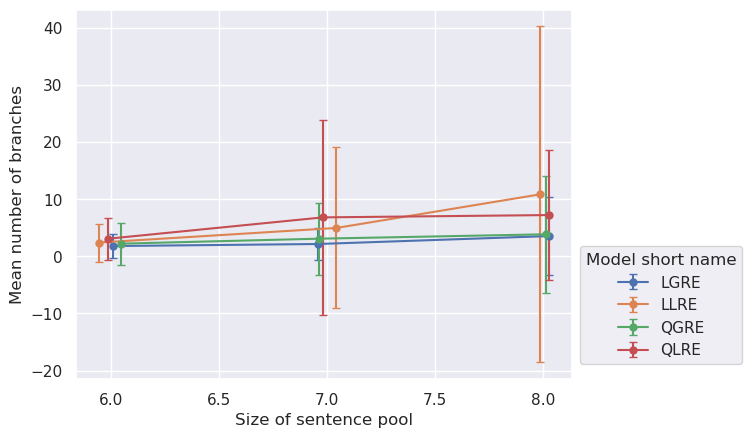

In [40]:
# adding jitter
import random

df_n_branches['n_sentence_pool_jitter'] = df_n_branches.apply(lambda x: x['n_sentence_pool']+random.uniform(-0.06, 0.06), axis=1)

for name, group in df_n_branches.groupby('model_short_name'):
    #display(group)
    plt.errorbar(group['n_sentence_pool_jitter'], 
                 group['mean'],
                 yerr=group['std'],
                 marker='o', 
                 #linestyle='', 
                 markersize=5,
                 capsize=3,
                 label=name)


plt.legend(loc='center left', bbox_to_anchor=(1., 0.2), ncol=1, title='Model short name')
plt.ylabel('Mean number of branches')
plt.xlabel('Size of sentence pool')

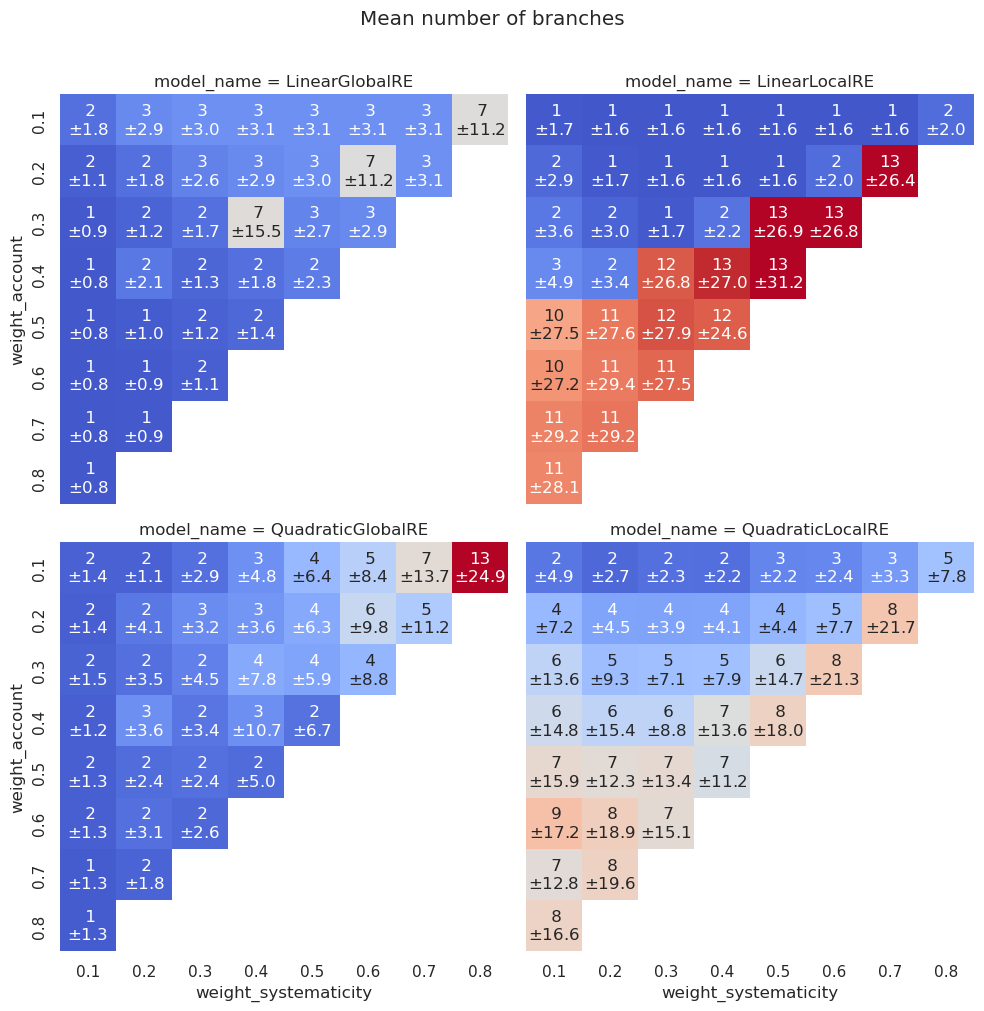

In [45]:
normalized_heat_maps_by_weights(re_data = df_branches, values = 'n_branches', 
                         title = 'Mean number of branches', 
                         annot_std = True, annot_std_fmt = r'$\pm${:2.1f}', vmin=1, vmax=13)

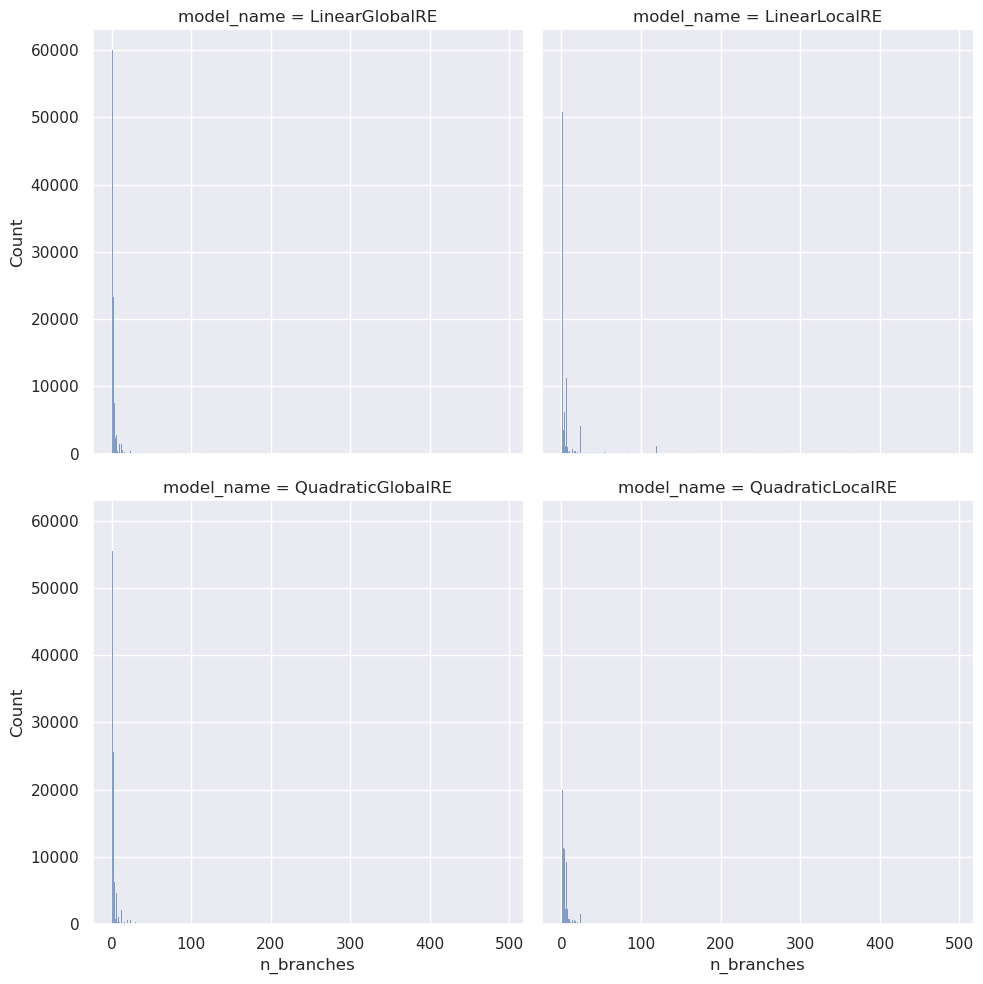

In [43]:
sns.displot(df_branches, x="n_branches", discrete=True, 
            col="model_name", col_wrap=2)

## Step length

In [31]:
from typing import Set, List

def apply_fun_to_adjacents(li: List[any],fun) -> List[any]:
    if len(li) == 1:
        return []
    else: 
        return [fun(li[0], li[1])] + apply_fun_to_adjacents(li[1:], fun)
    
def simple_hamming(x:Set, y:Set) -> float:
    return len(x.union(y).difference(x.intersection(y)))

def mean_simple_hamming(li:List[Set[int]]) -> float:
    ret = apply_fun_to_adjacents(li, simple_hamming)
    return 0 if len(ret) == 0 else sum(ret)/len(ret) 

re_data_head = re_data.head(10).copy()
# mean simple hamming distance between adjacent commitments in the process evolution of commitments 
#re_data_head['li'] = 
#re_data_head['fun_to_adj'] = 

#re_data_head['mean_step_hamming_size_coms'] = re_data_head.apply(lambda x: mean_simple_hamming(list(set([frozenset(coms) for 
#                                                                                               coms in  x['coms_evolution']] + 
#                                                                                              [frozenset(x['init_coms'])]))) , axis = 1)
#re_data_head['mean_step_hamming_size_coms'] = re_data_head.apply(lambda x: mean_simple_hamming(list(x['coms_evolution'])[:-1]), axis = 1)
re_data['mean_step_hamming_size_coms'] = re_data.apply(lambda x: mean_simple_hamming(list(x['coms_evolution'])[:-1]), axis = 1)


In [17]:
coms_evo = [{-5, 2, 6}, {-5, 2, 6}]
coms_evo = [{-4, -3, -1, 5}, {-4, -3, -1, 5, 6}, {-4, -3, -2, -1, 5, 6},{-4, -3, -2, -1, 5, 6}]
coms_evo = [{-5, -2, 1, 3}, {-6, -5, -4, -2, 1, 3}, {-6, -5, -4, -2, 1, 3}]
print(coms_evo[:-1])
init_coms = {1, 3, -2, -5}
li = list(set([frozenset(coms) for coms in  coms_evo] + [frozenset(init_coms)]))
print(li)
print(apply_fun_to_adjacents(li, simple_hamming))
mean_simple_hamming(li)

[{1, 3, -2, -5}, {1, 3, -6, -5, -4, -2}]
[frozenset({1, 3, -2, -5}), frozenset({1, 3, -6, -5, -4, -2})]
[2]


2.0

In [30]:
display(re_data_head[['coms_evolution', 'mean_step_hamming_size_coms', 'mean_step_hamming_size_coms2' ]])

,coms_evolution,mean_step_hamming_size_coms,mean_step_hamming_size_coms2
0,"[{1, 3, -2, -5}, {1, 3, -6, -5, -4, -2}, {1, 3...",2.0,2.0
1,"[{2, -5, 6}, {2, -5, 6}]",0.0,0.0
2,"[{2, -5, -4, -3}, {2, 6, -5, -4, -3, -1}, {2, ...",2.0,2.0
3,"[{2, -5, -4, -3}, {2, 6, -5, -4, -3, -1}, {2, ...",2.0,2.0
4,"[{5, -4, -3, -1}, {5, 6, -4, -3, -1}, {5, 6, -...",1.5,1.0
5,"[{5, -4, -3, -1}, {5, 6, -4, -3, -1}, {5, 6, -...",1.5,1.0
6,"[{2, -3}, {2, 6, -5, -3, -1}, {2, 6, -5, -3, -1}]",3.0,3.0
7,"[{-3, -2, 6}, {5, -3, -2, 6}, {5, -3, -2, 6}]",1.0,1.0
8,"[{-3, -2, 6}, {-1, -3, -2, 6}, {-1, -3, -2, 6}]",1.0,1.0
9,"[{1, 2, 6}, {1, 2, -5, 6}, {1, 2, -5, 6}]",1.0,1.0


In [19]:
list(re_data_head['coms_evolution'])

[[{-5, -2, 1, 3}, {-6, -5, -4, -2, 1, 3}, {-6, -5, -4, -2, 1, 3}],
 [{-5, 2, 6}, {-5, 2, 6}],
 [{-5, -4, -3, 2}, {-5, -4, -3, -1, 2, 6}, {-5, -4, -3, -1, 2, 6}],
 [{-5, -4, -3, 2}, {-5, -4, -3, -1, 2, 6}, {-5, -4, -3, -1, 2, 6}],
 [{-4, -3, -1, 5},
  {-4, -3, -1, 5, 6},
  {-4, -3, -2, -1, 5, 6},
  {-4, -3, -2, -1, 5, 6}],
 [{-4, -3, -1, 5},
  {-4, -3, -1, 5, 6},
  {-4, -3, -2, -1, 5, 6},
  {-4, -3, -2, -1, 5, 6}],
 [{-3, 2}, {-5, -3, -1, 2, 6}, {-5, -3, -1, 2, 6}],
 [{-3, -2, 6}, {-3, -2, 5, 6}, {-3, -2, 5, 6}],
 [{-3, -2, 6}, {-3, -2, -1, 6}, {-3, -2, -1, 6}],
 [{1, 2, 6}, {-5, 1, 2, 6}, {-5, 1, 2, 6}]]

In [32]:
re_data.groupby(['model_name','n_sentence_pool'])['mean_step_hamming_size_coms'].describe()


count      mean       std  min  25%  \
model_name        n_sentence_pool                                           
LinearGlobalRE    6                 64856.0  1.342836  1.391584  0.0  0.0   
                  7                 77776.0  1.574232  1.530538  0.0  0.0   
LinearLocalRE     6                 86708.0  0.946470  0.457618  0.0  1.0   
                  7                178528.0  1.029265  0.359234  0.0  1.0   
QuadraticGlobalRE 6                 79942.0  1.663858  1.033134  0.0  1.0   
                  7                111262.0  1.995719  1.135086  0.0  1.0   
QuadraticLocalRE  6                110618.0  1.051959  0.336269  0.0  1.0   
                  7                245427.0  1.067368  0.266228  0.0  1.0   

                                   50%  75%  max  
model_name        n_sentence_pool                 
LinearGlobalRE    6                1.0  2.0  7.0  
                  7                1.0  3.0  8.0  
LinearLocalRE     6                1.0  1.0  2.0  
                  7                1.0  1.2  2.0  
QuadraticGlobalRE 6                1.5  2.0  6.0  
                  7                2.0  3.0  7.0  
QuadraticLocalRE  6                1.0  1.0  2.0  
                  7                1.0  1.0  2.0

## Consistency

Here, we confine the analysis to a result perspective. We count in the result set of a model run's fixed points (and global optima) how often theory-commitments pairs are dialectically consistents. (The alternative would be to adopt a process perspective by asking how often does the process end up in dialectically consistent theory-commitments pairs. The difference is that different branches of one model run might end up in the same fixed point.)

### Commitments consistency in global optima and fixed points

In [69]:
# 
re_data['go_n_coms_consistent'] = re_data.apply(lambda x: sum(x['go_coms_consistent']), axis=1)
re_data['fp_n_coms_consistent'] = re_data.apply(lambda x: sum(x['fp_coms_consistent']), axis=1)

# restrict data to unique simulation setups to prevent multiple counting of branches 
re_data_unique_setups = re_data.drop_duplicates(["model_name",
                         "ds",
                         "n_sentence_pool",
                         'weight_account', 
                         'weight_systematicity',
                         'weight_faithfulness', 
                         'init_coms'
                        ])

In [70]:
# -> overall mean
result_df = re_data_unique_setups.groupby(['model_name'])[['go_n_coms_consistent','fp_n_coms_consistent', 
                                               'n_global_optima', 'n_fixed_points']].sum()
result_df['go_rel_coms_consistent'] = result_df.apply(lambda x: x['go_n_coms_consistent']/x['n_global_optima'], axis=1)
result_df['fp_rel_coms_consistent'] = result_df.apply(lambda x: x['fp_n_coms_consistent']/x['n_fixed_points'], axis=1)
display(result_df[['go_rel_coms_consistent', 'fp_rel_coms_consistent']])

,go_rel_coms_consistent,fp_rel_coms_consistent
model_name,,
LinearGlobalRE,0.796371,0.767254
LinearLocalRE,0.796371,0.832709
QuadraticGlobalRE,0.765254,0.769329
QuadraticLocalRE,0.736748,0.725570


In [74]:
# -> mean of means
# The following would only lead to means of means, which is, perhaps, not the value we are interested in.
re_data['go_rel_coms_consistent'] = re_data.apply(lambda x: (sum(x['go_coms_consistent'])/x["n_global_optima"]), axis=1)
re_data['fp_rel_coms_consistent'] = re_data.apply(lambda x: (sum(x['fp_coms_consistent'])/x["n_fixed_points"]), axis=1)

# restrict data to unique simulation setups to prevent multiple counting of branches 
re_data_unique_setups = re_data.drop_duplicates(["model_name",
                         "ds",
                         "n_sentence_pool",
                         'weight_account', 
                         'weight_systematicity',
                         'weight_faithfulness', 
                         'init_coms'
                        ])
re_data_unique_setups.groupby(['model_name'])[['go_rel_coms_consistent','fp_rel_coms_consistent']].describe()

go_rel_coms_consistent                                     \
                                   count      mean       std  min       25%   
model_name                                                                    
LinearGlobalRE                   10800.0  0.787587  0.392486  0.0  0.963839   
LinearLocalRE                    10800.0  0.787587  0.392486  0.0  0.963839   
QuadraticGlobalRE                10800.0  0.736150  0.390980  0.0  0.500000   
QuadraticLocalRE                  8640.0  0.727627  0.399842  0.0  0.500000   

                                 fp_rel_coms_consistent                      \
                   50%  75%  max                  count      mean       std   
model_name                                                                    
LinearGlobalRE     1.0  1.0  1.0                10800.0  0.784247  0.403564   
LinearLocalRE      1.0  1.0  1.0                10800.0  0.777653  0.412376   
QuadraticGlobalRE  1.0  1.0  1.0                10800.0  0.763186  0.393004   
QuadraticLocalRE   1.0  1.0  1.0                 8640.0  0.748133  0.380589   

                                            
                   min  25%  50%  75%  max  
model_name                                  
LinearGlobalRE     0.0  1.0  1.0  1.0  1.0  
LinearLocalRE      0.0  1.0  1.0  1.0  1.0  
QuadraticGlobalRE  0.0  0.5  1.0  1.0  1.0  
QuadraticLocalRE   0.0  0.5  1.0  1.0  1.0

### Dialectical consistency of positions in global optima and fixed point

Here, we only count those in-/consistencies, which result from combining dialectically consistent commitments with their theories. In other words, we are interested in those inconsistencies in positions which cannot be explained by commitments being inconsistent on their own (which we already assessed above).

Relevant data fields:

+ The field `go_union_consistent`: A list of bools (List[bool]) indicating whether the unions of a commitment-theory-tuple of the global_optima are dialectically consistent. I.e. whether the global optima are RE states.The order of the list represents the order in global_optima.
+ The fied `fp_union_consistent`: A list of bools (List[bool]) indicating whether the unions of a commitment-theory-tuple of the fixed_points are dialectically consistent.The order of the list represents the order in fixed_points.

In [76]:
# The col `go_union_consistent` contains values indicating whether the union of coms and theories is 
# consistent. Here, we restrict the list to those values where the coms are consistent on their own.

# for gos
re_data['go_union_consistent_restr'] = re_data.apply(lambda x: [x['go_union_consistent'][i] 
                                                                 for i in range(x['n_global_optima']) 
                                                                 if x['go_coms_consistent'][i]], axis=1)
re_data['go_union_consistent_restr_count'] = re_data.apply(lambda x: sum(x['go_union_consistent_restr']) , axis=1)
re_data['go_union_consistent_restr_size'] = re_data.apply(lambda x: len(x['go_union_consistent_restr']), axis=1)
# for fps
re_data['fp_union_consistent_restr'] = re_data.apply(lambda x: [x['fp_union_consistent'][i] 
                                                                 for i in range(x['n_fixed_points']) 
                                                                 if x['fp_coms_consistent'][i]], axis=1)
re_data['fp_union_consistent_restr_count'] = re_data.apply(lambda x: sum(x['fp_union_consistent_restr']) , axis=1)
re_data['fp_union_consistent_restr_size'] = re_data.apply(lambda x: len(x['fp_union_consistent_restr']), axis=1)


# restrict data to unique simulation setups to prevent multiple counting of branches 
re_data_unique_setups = re_data.drop_duplicates(["model_name",
                         "ds",
                         "n_sentence_pool",
                         'weight_account', 
                         'weight_systematicity',
                         'weight_faithfulness', 
                         'init_coms'
                        ])

In [66]:
#display(re_data.head(50,100)[['go_coms_consistent','go_union_consistent','t1']])
display(re_data.iloc[50:100,:][['go_coms_consistent','go_union_consistent', 'go_union_consistent_restr', 
                               'go_union_consistent_restr_count', 'go_union_consistent_restr_size']])


,go_coms_consistent,go_union_consistent,go_union_consistent_restr,go_union_consistent_restr_count,go_union_consistent_restr_size
50,[True],[True],[True],1,1
51,[False],[False],[],0,0
52,[False],[False],[],0,0
53,[True],[True],[True],1,1
54,"[False, True]","[False, True]",[True],1,1
55,"[True, True, False]","[True, True, False]","[True, True]",2,2
56,"[True, True]","[True, True]","[True, True]",2,2
57,"[True, True]","[True, True]","[True, True]",2,2
58,"[True, True]","[True, True]","[True, True]",2,2
59,"[True, True]","[True, True]","[True, True]",2,2


In [77]:
# -> overall mean
result_df = re_data_unique_setups.groupby(['model_name'])[['go_union_consistent_restr_count', 'go_union_consistent_restr_size',
                                                          'fp_union_consistent_restr_count', 'fp_union_consistent_restr_size']].sum()

result_df['go_rel_union_consistent'] = result_df.apply(lambda x: x['go_union_consistent_restr_count']/x['go_union_consistent_restr_size'], axis=1)
result_df['fp_rel_union_consistent'] = result_df.apply(lambda x: x['fp_union_consistent_restr_count']/x['fp_union_consistent_restr_size'], axis=1)

display(result_df[['go_rel_union_consistent', 'fp_rel_union_consistent']])

,go_rel_union_consistent,fp_rel_union_consistent
model_name,,
LinearGlobalRE,0.965030,0.960702
LinearLocalRE,0.965030,0.973882
QuadraticGlobalRE,0.926208,0.911060
QuadraticLocalRE,0.923134,0.915344
